In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [67]:
dataset = open("Movies_TV.txt").read()
dataset = dataset.split('\n')
dataset.remove(dataset[0])
dataset.remove(dataset[-1])
dataset.remove(dataset[-1])

In [68]:
reviews = []
label_list = []
for item in dataset:
    _, label, _, text = item.split('\t')
    reviews.append(text)
    label_list.append(label)

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer(max_df = 600, min_df = 5, ngram_range = (1,3), max_features = 100)
X = vectorize.fit_transform(reviews)
X = X.toarray()

In [70]:
vectorize.vocabulary_

{'my': 44,
 'love': 38,
 'film': 20,
 'get': 25,
 'story': 72,
 'great': 28,
 'think': 81,
 'can': 10,
 'really': 61,
 'as': 4,
 'well': 91,
 'on': 50,
 'episode': 18,
 'new': 46,
 'from': 24,
 'what': 92,
 'at': 5,
 'dvd': 17,
 'see': 65,
 'that': 74,
 'time': 84,
 'movie': 42,
 'in': 32,
 'not': 47,
 'for': 22,
 'to be': 85,
 'be the': 7,
 'of the': 48,
 'be not': 6,
 'have': 29,
 'old': 49,
 'he': 30,
 'so': 70,
 'other': 56,
 'original': 55,
 'one': 52,
 'out': 57,
 'but': 8,
 'we': 90,
 'will': 96,
 'there': 78,
 'watch': 89,
 'character': 11,
 'lrb': 39,
 'which': 94,
 'rrb': 62,
 'would': 98,
 'if': 31,
 'even': 19,
 'cinderella': 12,
 'she': 67,
 'do': 14,
 'they': 80,
 'with': 97,
 'who': 95,
 'just': 36,
 'it be': 35,
 'to the': 86,
 'in the': 33,
 'there be': 79,
 'for the': 23,
 'do not': 15,
 'this movie': 83,
 'that be': 75,
 'never': 45,
 'doctor': 16,
 'show': 68,
 'the doctor': 76,
 'this be': 82,
 'disney': 13,
 'some': 71,
 'good': 27,
 'up': 87,
 'all': 1,
 'the mov

In [71]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11948648, 0.        ,
        0.12505457]])

In [72]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, label_list, shuffle = True, train_size=0.7)

In [73]:
len(trainX), len(testX)

(700, 300)

In [74]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [75]:
linear = SGDClassifier()
naivebayes = GaussianNB()
decisiontree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [76]:
linear.fit(trainX, trainY)
naivebayes.fit(trainX, trainY)
decisiontree.fit(trainX, trainY)
knn.fit(trainX, trainY)

KNeighborsClassifier()

In [77]:
pred_y_linear = linear.predict(testX)
pred_y_naivebayes = naivebayes.predict(testX)
pred_y_decisiontree = decisiontree.predict(testX)
pred_y_knn = knn.predict(testX)

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
linear_accuracy = accuracy_score(testY, pred_y_linear)
naivebayes_accuracy = accuracy_score(testY, pred_y_naivebayes)
decisiontree_accuracy = accuracy_score(testY, pred_y_decisiontree)
knn_accuracy = accuracy_score(testY, pred_y_knn)

In [79]:
print("Linear: ", linear_accuracy)
print("Naive Bayes: ", naivebayes_accuracy)
print("Decision Tree: ", decisiontree_accuracy)
print("KNN: ", knn_accuracy)

Linear:  0.8333333333333334
Naive Bayes:  0.46
Decision Tree:  0.7333333333333333
KNN:  0.7866666666666666


In [80]:
confusion_matrix(testY, pred_y_linear)

array([[  5,   3,  19],
       [  0,   2,  18],
       [  3,   7, 243]], dtype=int64)

In [81]:
X.reshape(-1,1)

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.11948648],
       [0.        ],
       [0.12505457]])

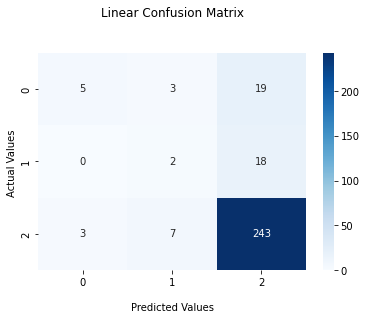

In [93]:
linear_matrix = confusion_matrix(testY,pred_y_linear)
ax = sns.heatmap(linear_matrix, annot=linear_matrix,  fmt='', cmap='Blues')

ax.set_title('Linear Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [94]:
print('Accuracy: %.3f' % accuracy_score(testY,pred_y_linear))

Accuracy: 0.833


In [95]:
print('Precision: %.3f' % precision_score(testY,pred_y_linear, average='micro'))

Precision: 0.833


In [96]:
print('Recall: %.3f' % recall_score(testY,pred_y_linear, average='micro'))

Recall: 0.833


In [97]:
print('F1 Score: %.3f' % f1_score(testY,pred_y_linear, average='micro'))

F1 Score: 0.833
